# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [ ]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [ ]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
result = ds[ds['price'] == ds['price'].max()][['address', 'price']].iloc[0]
print(f'The house with address {result.address} is the most expensive and its price is {result.price} USD')

#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [ ]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
result = ds[ds['price'] == ds['price'].min()][['address', 'price']].iloc[0]
print(f'The house with address {result.address} is the cheapest and its price is {result.price} USD')

#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [ ]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
bigger = ds[ds['surface'] == ds['surface'].max()][['address', 'surface']].iloc[0]
smaller = ds[ds['surface'] == ds['surface'].min()][['address', 'surface']].iloc[0]
print(f"""The bigger house is located on {bigger.address} and its surface is {bigger.surface} meters
The smaller house is located on {smaller.address} and its surface is {smaller.surface} meters""")

#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [ ]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# docs: <https://pandas.pydata.org/docs/reference/api/pandas.unique.html>

populations = ", ".join(pd.unique(ds['level5']))
print(populations)

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [ ]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# docs: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna>

ds.isna()

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [ ]:
import pandas as pd

# docs:
# - dropna <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna>
# - shape: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape>

original = pd.read_csv('assets/real_estate.csv', sep=';')

# dropping 'columns' which has missing values
after_deletions = original.dropna(axis=1)
print(f'original: {original.shape}, after deletions: {after_deletions.shape}')

#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [ ]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

# docs: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html>
mean_price = ds[ds.level5 == 'Arroyomolinos (Madrid)'].price.mean()
round(mean_price, 2)

#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

In [ ]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

filtered_ds = ds[ds.level5 == 'Arroyomolinos (Madrid)']

# doc: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html#pandas.DataFrame.plot.hist>
filtered_ds['price'].plot.hist()


**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 09. Are the averages of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [ ]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

# docs:
# - <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html#pandas.DataFrame.isin>
# - <https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html>
filtered_ds = ds[ds.level5.isin(['Valdemorillo','Galapagar'])][['level5', 'price', 'surface']]
filtered_ds.groupby('level5')['price'].mean()

#### Exercise 10. Are the averages of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [ ]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
filtered_ds = ds[ds.level5.isin(['Valdemorillo','Galapagar'])][['level5', 'price', 'surface']]
filtered_ds['pps'] = filtered_ds.price / filtered_ds.surface
filtered_ds.groupby('level5')['pps'].mean()

# In average, Galapagar has more expensive price/m2 than Valdemorillo

#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

In [ ]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

# doc: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html>
# selecting only the columns we really need and dropping NaN
filtered_ds = ds[['price', 'surface']].dropna()
filtered_ds
filtered_ds.plot.scatter(x='price', y='surface')


# There is data with weird values on the surface field (too high) which gives us a flat scatter plot
# Filtering out apartments with surface greater then 3000 m2
fixed_ds = filtered_ds[filtered_ds['surface'] <= 3000]
fixed_ds.plot.scatter(x='price', y='surface')

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [ ]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

# doc: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html#pandas.DataFrame.nunique>
ds['id_realEstates'].nunique()

#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [ ]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

# grouping by population (level5) and counting (using method `size`)

# to add a name to the new column I used the function reset_index, as stated on the below URL:
# - <https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby>
# - doc: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.reset_index.html#pandas.Series.reset_index>
new_data = ds.groupby('level5')['level5'].size().reset_index(name='counts')
new_data[new_data['counts'] == new_data['counts'].max()]

#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [ ]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
south_belt_ds = ds[ds.level5.isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])]
south_belt_ds

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

<Axes: xlabel='level5'>

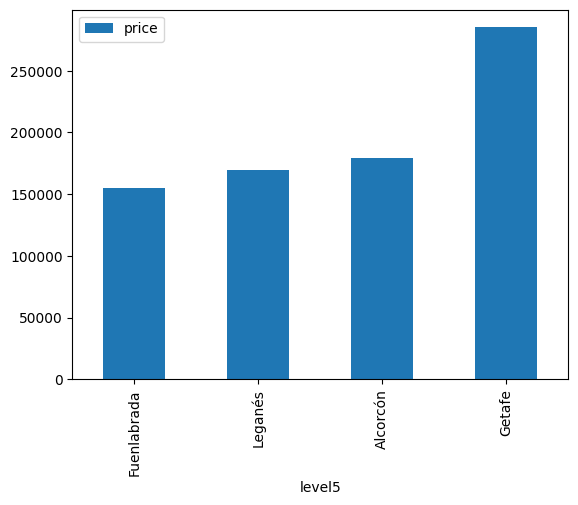

In [154]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
south_belt_ds = ds[ds.level5.isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])]

# 1: select only the columns we need
# 2: group by community (level6=5) and calculate the median price of the group before plotting
# 3: as we have only two columns the plot method can work with this data without parameters

south_belt_ds[['level5', 'price']].groupby('level5').median().sort_values(by='price').plot.bar()

Fuenlabrada, Leganés and Alcorcón have similar median values, around 150000, and Getafe has the highest medium value, that is greater than 250000

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [ ]:
# TODO

#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [ ]:
# TODO

#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

In [ ]:
# TODO

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [ ]:
# TODO

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

In [ ]:
# TODO

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [ ]:
from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
